# Chapter 5 Cross-Validation Applied Exercises

### 5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

In [86]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#### Import data

In [87]:
# Import the Default data
df_default = pd.read_csv(r'..\Data sets\Default.csv')

# Let's start practising creating copies of the original data:
df_default_raw = df_default

#### Show the dataframe

In [88]:
df_default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


#### Create dummy variables

In [89]:
df_default = pd.get_dummies(df_default, dtype=np.float64).drop(['default_No', 'student_No'], axis=1)
df_default

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0.0,0.0
1,817.180407,12106.134700,0.0,1.0
2,1073.549164,31767.138947,0.0,0.0
3,529.250605,35704.493935,0.0,0.0
4,785.655883,38463.495879,0.0,0.0
...,...,...,...,...
9995,711.555020,52992.378914,0.0,0.0
9996,757.962918,19660.721768,0.0,0.0
9997,845.411989,58636.156984,0.0,0.0
9998,1569.009053,36669.112365,0.0,0.0


#### (a) Fit a logistic regression model that uses income and balance to predict default.

In [90]:
# Split the model into an X an y set:
X = df_default[['balance','income']]
y = df_default['default_Yes']

# Set up the model
logist_default = LogisticRegression()

# Fit the model
results_logist_default = logist_default.fit(X,y)

# Make predictions
y_pred_default_logist = results_logist_default.predict(X)

#### I need the confusion matrix and metrics functions I wrote for Chapter 4:

In [91]:
def confusion_matrix(confusion_matrix):
    """Return a confusion matrix that is formatted neatly. Takes the sklearn confusion matrix as input and return better formatted confusion matrix.
    Wikepedia's convention is followed: https://en.wikipedia.org/wiki/Confusion_matrix"""
    TP = confusion_matrix[1,1] # True positives
    FP = confusion_matrix[0,1] # False positives
    TN = confusion_matrix[0,0] # True negatives
    FN = confusion_matrix[1,0] # False negatives

    Actual_1_sum = TP + FN # Row 1 sum
    Actual_0_sum = FP + TN # Row 2 sum
    Predict_1_sum = TP + FP # Column 1 sum
    Predict_0_sum = FN + TN # Column 2 sum

    if (Actual_1_sum + Actual_0_sum) != (Predict_1_sum + Predict_0_sum):
        print("There is an error.")
    else:
        Total = Actual_0_sum + Actual_1_sum # Total

    confusion_df = pd.DataFrame({'Predicted 1': [TP,FP,Predict_1_sum],
                                 'Predicted 0': [FN,TN,Predict_0_sum],
                                 'Total': [Actual_1_sum,Actual_0_sum, Total],
                                 '': ['Actual 1', 'Actual 0', 'Total']}).set_index('')
    return confusion_df

def confusion_matrix_metrics(y_true,y_pred,confusion_matrix,decimal_places,col_name):
    """Show all the metrics of the confusion matrix in a neatly formatted way. Uses the sklearn metrics functions.
    Inputs are y_actual, y_pred, confusion_matrix from sklearn, decimal places, and name of the model"""

    # Get metrics
    accuracy = round(metrics.accuracy_score(y_true,y_pred),decimal_places)
    precision = round(metrics.precision_score(y_true,y_pred),decimal_places)
    recall = round(metrics.recall_score(y_true,y_pred),decimal_places)
    F_score = round(metrics.f1_score(y_true,y_pred),decimal_places)
    auc = round(metrics.roc_auc_score(y_true,y_pred),decimal_places)

    # Define true positives, false positives, true negatives, and false negatives
    TP = confusion_matrix[1,1] # True positives
    FP = confusion_matrix[0,1] # False positives
    TN = confusion_matrix[0,0] # True negatives
    FN = confusion_matrix[1,0] # False negatives

    # Sum these values
    Actual_1_sum = TP + FN # Row 1 sum
    Actual_0_sum = FP + TN # Row 2 sum
    Predict_1_sum = TP + FP # Column 1 sum
    Predict_0_sum = FN + TN # Column 2 sum
    
    # Calculate some more metrics
    true_positive_rate = round(TP/(TP+FN),decimal_places)
    false_positive_rate = round(FP/(FP+TN),decimal_places)

    # Create row names
    rows = ['Accuracy', 'Precision', 'Recall', 'F-score', 'True positive rate', 'False positive rate','Area under ROC curve']

    # Create column values
    columns = [accuracy,precision,recall,F_score,true_positive_rate,false_positive_rate,auc]     

    # Create a dataframe to display the values
    result = pd.DataFrame({str(col_name):columns},index=rows)
    return result

#### Confusion matrix

In [92]:
cm_default_logist = metrics.confusion_matrix(y, y_pred_default_logist)
confusion_matrix(cm_default_logist)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,108,225,333
Actual 0,38,9629,9667
Total,146,9854,10000


#### Confusion matrix metrics

In [93]:
confusion_matrix_metrics(y, y_pred_default_logist, cm_default_logist, 4, 'Logistic Regression')

,Logistic Regression
Accuracy,0.9737
Precision,0.7397
Recall,0.3243
F-score,0.4509
True positive rate,0.3243
False positive rate,0.0039
Area under ROC curve,0.6602


#### (b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:
i. Split the sample set into a training set and a validation set.

ii. Fit a multiple logistic regression model using only the training observations.

iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.

iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

#### (c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [94]:
for i in range(1,4,1):
    # Split into a train and test set:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Set up the model
    logist_default = LogisticRegression()

    # Fit the model
    results_logist_default = logist_default.fit(X_train,y_train)

    # Make predictions
    y_pred_default_logist = results_logist_default.predict(X_test)
    
    print('Random state ' + str(i))
    cm = metrics.confusion_matrix(y_test, y_pred_default_logist)
    print('')
    display(confusion_matrix(cm))
    print('')
    display(confusion_matrix_metrics(y_test, y_pred_default_logist, cm, 4, 'Logistic Regression'))
    print('')
    

Random state 1



,Predicted 1,Predicted 0,Total
,,,
Actual 1,33,58,91
Actual 0,16,2893,2909
Total,49,2951,3000


,Logistic Regression
Accuracy,0.9753
Precision,0.6735
Recall,0.3626
F-score,0.4714
True positive rate,0.3626
False positive rate,0.0055
Area under ROC curve,0.6786



Random state 2



,Predicted 1,Predicted 0,Total
,,,
Actual 1,23,53,76
Actual 0,18,2906,2924
Total,41,2959,3000


,Logistic Regression
Accuracy,0.9763
Precision,0.5610
Recall,0.3026
F-score,0.3932
True positive rate,0.3026
False positive rate,0.0062
Area under ROC curve,0.6482



Random state 3



,Predicted 1,Predicted 0,Total
,,,
Actual 1,37,69,106
Actual 0,6,2888,2894
Total,43,2957,3000


,Logistic Regression
Accuracy,0.9750
Precision,0.8605
Recall,0.3491
F-score,0.4966
True positive rate,0.3491
False positive rate,0.0021
Area under ROC curve,0.6735


Different splits of the training data yield slightly different results. The fraction of misclassified results are still quite close, near 0.02.

#### (d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [95]:
# Split the model into an X an y set:
X = df_default[['balance','income','student_Yes']]
y = df_default['default_Yes']

# Split the model into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up the model
logist_default_5d = LogisticRegression()

# Fit the model
results_logist_default_5d = logist_default_5d.fit(X_train,y_train)

# Make predictions
y_pred_default_logist_5d = results_logist_default_5d.predict(X_test)


#### Confusion matrix

In [96]:
cm_default_logist_5b = metrics.confusion_matrix(y_test, y_pred_default_logist_5d)
confusion_matrix(cm_default_logist_5b)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,19,75,94
Actual 0,20,2886,2906
Total,39,2961,3000


#### Confusion matrix metrics

In [97]:
confusion_matrix_metrics(y_test, y_pred_default_logist_5d, cm_default_logist_5b, 4, 'Logistic Regression')

,Logistic Regression
Accuracy,0.9683
Precision,0.4872
Recall,0.2021
F-score,0.2857
True positive rate,0.2021
False positive rate,0.0069
Area under ROC curve,0.5976


In [98]:
print('The misclassified predictions are ' + str(cm_default_logist_5b[0,1]) + ' + ' + str(cm_default_logist_5b[1,0]) + ' = ' + str(cm_default_logist_5b[0,1]+cm_default_logist_5b[1,0]) + '. The fraction of misclassified observations are ' + str(round((cm_default_logist_5b[0,1]+cm_default_logist_5b[1,0])/cm_default_logist_5b.sum(),4)) + '.')

The misclassified predictions are 20 + 75 = 95. The fraction of misclassified observations are 0.0317.


It doesn't look like adding student to the model improved the results in such a way to get too excited. 

### 6. We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the *Default* data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to set a random seed before beginning your analysis.

#### (a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.

In [99]:
# Fit a logistic regression to predict default by using income and balance
f_6a = 'default_Yes ~ income + balance'

# Set up the model
model_logist_6a = sm.Logit.from_formula(formula=f_6a, data=df_default)
results_logist_6a = model_logist_6a.fit()

display(results_logist_6a.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 30 Mar 2024   Pseudo R-squ.:                  0.4594
Time:                        16:51:31   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### (b) Write a function, boot_fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

In [100]:
def boot_fn(df, idx):

    response = 'default_Yes'
    predictors = ['income', 'balance']

    X = sm.add_constant(np.array(df[predictors].loc[idx]))
    y = np.array(df[response].iloc[idx])

    # Set up the model
    model_logist = sm.Logit(y, X)
    results_logist = model_logist.fit()

    return results_logist.params

#### (c) Following the bootstrap example in the lab, use your boot_fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.


In [101]:
def boot_idx(n):
    """Return index for bootstrap sample of size n
    e.g. generate array in range 0 to n, with replacement"""
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    """Perform bootstrap for B number of samples"""
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

def standard_deviation(X):
    """Compute deviation error for jth element in matrix X
    equivalent to np.std(X, axis=0)"""
    X_bar = np.mean(X, axis=0)
    SE = np.sqrt((np.sum(np.square(X - X_bar), axis=0)) / (len(X)))
    return SE

B = 10
coef_preds = boot(boot_fn, df_default, samples=B)
coef_pred = np.mean(coef_preds, axis=0)
standard_errs = standard_deviation(coef_preds)

bootstrap_est = pd.DataFrame({'coef_boot': coef_pred, 'SE_boot': standard_errs})
display(bootstrap_est)

Optimization terminated successfully.
         Current function value: 0.074168
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078378
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.085370
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081632
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.085837
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079483
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081079
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080865
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079523
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

,coef_boot,SE_boot
0,-11.444421,0.326457
1,0.000020,0.000004
2,0.005632,0.000192


In [102]:
statsmodels_est = pd.DataFrame({'coef_sm': results_logist_6a.params, 'SE_sm': results_logist_6a.bse})
display(statsmodels_est)

,coef_sm,SE_sm
Intercept,-11.540468,0.434772
income,0.000021,0.000005
balance,0.005647,0.000227


### (d) Comment on the estimated standard errors obtained using the glm() function and using your bootstrap function.

The answers are very similar for both methods, even with small bootstrap samples. 

### 7. In Sections 5.1.2 and 5.1.3, we saw that the cross_validate() function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just sm.GLM() and the predict() method of the fitted model within a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classiication problems, the LOOCV error is given in (5.4).

#### (a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.

In [103]:
# Import data
df_weekly = pd.read_csv(r'..\Data sets\Weekly.csv')
df_weekly_raw = df_weekly

In [104]:
# Get dummy variables
df_weekly = pd.get_dummies(df_weekly, dtype=np.float64).drop(columns=['Direction_Down'])
df_weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0.0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0.0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1.0
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1.0
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1.0
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1.0
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1.0
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1.0
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1.0


In [105]:
# Fit a logistic regression to predict Direction using Lag1 and Lag2
f_7a = 'Direction_Up ~ Lag1 + Lag2'

# Set up the model
model_logist_7a = sm.Logit.from_formula(formula=f_7a, data=df_weekly)
results_logist_7a = model_logist_7a.fit()

display(results_logist_7a.summary())

Optimization terminated successfully.
         Current function value: 0.683297
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Sat, 30 Mar 2024   Pseudo R-squ.:                0.005335
Time:                        16:51:32   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01848
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
==============================================================================
"""

#### (b) Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.

In [106]:
# Create index for LOOCV
train = df_weekly.index > 0

response   = 'Direction_Up'
predictors = ['Lag1', 'Lag2']

# Split into test and train set
X_train = np.array(df_weekly[train][predictors])
X_test  = np.array(df_weekly[~train][predictors])
y_train = np.array(df_weekly[train][response])
y_test  = np.array(df_weekly[~train][response])

# Fit the model
logist_7b       = LogisticRegression(fit_intercept=True)
results_logist_7b = logist_7b.fit(X_train, y_train)

### (c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if P(Direction="Up"|Lag1, Lag2) > 0.5. Was this observation correctly classified?

In [107]:
# Make prediction
y_pred_7b = results_logist_7b.predict(X_test)

In [108]:
#### Confusion matrix
cm_7b = metrics.confusion_matrix(y_test, y_pred_7b)
confusion_matrix(cm_7b)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,0,0,0
Actual 0,1,0,1
Total,1,0,1


The model predicted the direction incorrectly. 

#### (d) Write a for loop from i = 1 to i = n, where n is the number of observations in the data set, that performs each of the following steps:
i. Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.

ii. Compute the posterior probability of the market moving up for the ith observation.

iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.

iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.

In [109]:
response   = 'Direction_Up'
predictors = ['Lag1', 'Lag2']

y_pred = []

for i in range(df_weekly.shape[0]):
    # Create index for LOOCV
    train = df_weekly.index != i

    # Split into test and train set
    X_train = np.array(df_weekly[train][predictors])
    X_test  = np.array(df_weekly[~train][predictors])
    y_train = np.array(df_weekly[train][response])
    y_test  = np.array(df_weekly[~train][response])

    # Fit the model
    logist_7d = LogisticRegression(fit_intercept=True)
    results_logist_7d = logist_7d.fit(X_train, y_train)

    # Make predictions
    y_pred += [results_logist_7d.predict(X_test)]

y_pred = np.array(y_pred)
y_test = df_weekly[response]

#### (e) Take the average of the n numbers obtained in (d) (iv) in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [110]:
cm = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cm)

,Predicted 1,Predicted 0,Total
,,,
Actual 1,565,40,605
Actual 0,450,34,484
Total,1015,74,1089


In [111]:
print('The misclassified predictions are ' + str(cm[0,1]) + ' + ' + str(cm[1,0]) + ' = ' + str(cm[0,1]+cm[1,0]) + '. The fraction of misclassified observations are ' + str(round((cm[0,1]+cm[1,0])/cm.sum(),4)) + '.')

The misclassified predictions are 450 + 40 = 490. The fraction of misclassified observations are 0.45.


The error rate for LOOCV is 45%. In Chapter 4, we did a similar exercise and got an error rate of 43% when we did not split the data. Splitting using the test/train method yielded an error rate of 38%. LOOCV tends to overestimate the error rate. 

# 8. We will now perform cross-validation on a simulated data set.

#### (a) Generate a simulated data set as follows:

In [115]:
rng = np.random.default_rng(1)
X = rng.normal(size=100)
y = X - 2 * X**2 + rng.normal(size=100)

#### In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

$y = x - 2x^2 + \epsilon$

$y = \beta_0 + \beta_1x + \beta_2x^2 + \epsilon$

n = 100

p = 2

$\beta_0 = 0$

$\beta_1 = 1$

$\beta_2 = -2$

#### (b) Create a scatterplot of X against Y . Comment on what you find.

Text(0.5, 0, 'x-axis')

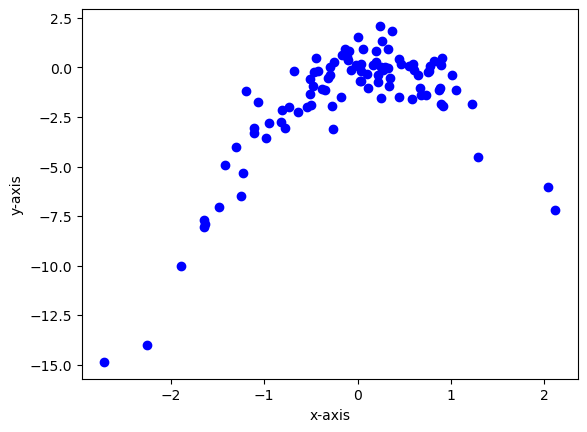

In [116]:
fig, ax = plt.subplots()
ax.plot(X,y,'bo')
ax.set_ylabel('y-axis')
ax.set_xlabel('x-axis')

The function is a parabola, but with some randomness built in. 

#### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
i. $Y = \beta_0 + \beta_1X + \epsilon$

ii. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon$

iii. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

iv. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \epsilon$

In [127]:
def loocv_8(random_seed, size):
    """Define a function to change the random seed an perform LOOCV"""

    rng = np.random.default_rng(random_seed)
    X = rng.normal(size=size)
    y = X - 2 * X**2 + rng.normal(size=size)

    # Add x and y to a dataframe
    df_8 = pd.DataFrame({'y':y, 'x':X}) 

    # Create the functions
    f_i = 'y ~ x'
    f_ii = 'y ~ x + np.power(x,2)'
    f_iii = 'y ~ x + np.power(x,2) + np.power(x,3)'
    f_iv = 'y ~ x + np.power(x,2) + np.power(x,3) + np.power(x,4)'

    formulas = {'x' : f_i,
                'x^2' : f_ii,
                'x^3' : f_iii,
                'x^4' : f_iv}

    errors = {}
    for f in formulas:
        y_pred = pd.Series({})
        for i in range(df_8.shape[0]):

        # Create index for LOOCV
            train = df_8.index != i
            
            # Create and fit the model
            model = sm.OLS.from_formula(formula=formulas[f], data=df_8[train])
            results = model.fit()

            # Make predictions
            y_hat = results.predict(exog=df_8[~train])
            y_pred = pd.concat([y_pred, y_hat])
        errors[f] = mean_squared_error(np.array(y_pred),y)
        print(results.summary())
        
    display(errors)

In [128]:
loocv_8(random_seed=1, size=100)

C:\Users\User-PC\AppData\Local\Temp\ipykernel_17588\1078734585.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({})


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     45.06
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           1.29e-09
Time:                        17:07:18   Log-Likelihood:                -229.02
No. Observations:                  99   AIC:                             462.0
Df Residuals:                      97   BIC:                             467.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4635      0.249     -5.869      0.0

C:\Users\User-PC\AppData\Local\Temp\ipykernel_17588\1078734585.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({})


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     379.6
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           2.57e-46
Time:                        17:07:18   Log-Likelihood:                -139.65
No. Observations:                  99   AIC:                             285.3
Df Residuals:                      96   BIC:                             293.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0600      0.120     -0.

C:\Users\User-PC\AppData\Local\Temp\ipykernel_17588\1078734585.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({})


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     254.2
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           3.02e-45
Time:                        17:07:19   Log-Likelihood:                -139.00
No. Observations:                  99   AIC:                             286.0
Df Residuals:                      95   BIC:                             296.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0429      0.121     -0.

C:\Users\User-PC\AppData\Local\Temp\ipykernel_17588\1078734585.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({})


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           3.76e-45
Time:                        17:07:21   Log-Likelihood:                -136.21
No. Observations:                  99   AIC:                             282.4
Df Residuals:                      94   BIC:                             295.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1172      0.136      0.

{'x': 6.633029839181983,
 'x^2': 1.1229368563419682,
 'x^3': 1.301796548935886,
 'x^4': 1.3323942694179316}

#### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [129]:
loocv_8(random_seed=42, size=100)

C:\Users\User-PC\AppData\Local\Temp\ipykernel_17588\1078734585.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({})


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     34.81
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           5.32e-08
Time:                        17:07:26   Log-Likelihood:                -207.67
No. Observations:                  99   AIC:                             419.3
Df Residuals:                      97   BIC:                             424.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1820      0.200     -5.897      0.0

C:\Users\User-PC\AppData\Local\Temp\ipykernel_17588\1078734585.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({})


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     224.9
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           5.86e-37
Time:                        17:07:27   Log-Likelihood:                -136.81
No. Observations:                  99   AIC:                             279.6
Df Residuals:                      96   BIC:                             287.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1076      0.123      0.

C:\Users\User-PC\AppData\Local\Temp\ipykernel_17588\1078734585.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({})


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     150.2
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           6.26e-36
Time:                        17:07:28   Log-Likelihood:                -136.32
No. Observations:                  99   AIC:                             280.6
Df Residuals:                      95   BIC:                             291.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1179      0.124      0.

C:\Users\User-PC\AppData\Local\Temp\ipykernel_17588\1078734585.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_pred = pd.Series({})


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     112.1
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           6.62e-35
Time:                        17:07:29   Log-Likelihood:                -136.08
No. Observations:                  99   AIC:                             282.2
Df Residuals:                      94   BIC:                             295.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0584      0.151      0.

{'x': 4.2518828656027745,
 'x^2': 0.9639984632709349,
 'x^3': 0.9912711879229298,
 'x^4': 1.018180104380911}

There is a large change in the mean squared error. I think it is because there is variance in the data, so the model suffers from high variance. 

#### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon$ 

This model has the lowest mean squared error, since it is in the same form as the real function. 

#### (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

We see the p-values of the power 3 and 4 are larger than 0.05, indicating that they are not statistically significant. This aligns with our expectations, since we know the true form is a parabola. This result is also reflected in the mean squared error. 